In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
raw=pd.read_csv('winequality-white.csv',sep=';')

In [13]:
raw.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [14]:
matrix=np.array(raw.values,'float')

In [69]:
matrix[:5,:]
matrix=matrix[matrix[:,11].argsort()]

In [70]:
x=matrix[:,:-1]
y=matrix[:,-1].reshape(-1,1)

In [71]:
x

array([[ 9.4 ,  0.24,  0.29, ...,  2.9 ,  0.38, 11.  ],
       [ 7.1 ,  0.32,  0.32, ...,  3.24,  0.4 , 11.5 ],
       [11.8 ,  0.23,  0.38, ...,  2.93,  0.55,  9.7 ],
       ...,
       [ 6.9 ,  0.36,  0.34, ...,  3.28,  0.36, 12.7 ],
       [ 6.6 ,  0.36,  0.29, ...,  3.41,  0.61, 12.4 ],
       [ 7.1 ,  0.26,  0.49, ...,  3.37,  0.42, 12.9 ]])

In [72]:
y

array([[3.],
       [3.],
       [3.],
       ...,
       [9.],
       [9.],
       [9.]])

In [96]:
x.shape

(4898, 11)

In [74]:
x_norm=x/x.max(axis=0)

In [75]:
x_norm

array([[0.66197183, 0.21818182, 0.1746988 , ..., 0.7591623 , 0.35185185,
        0.77464789],
       [0.5       , 0.29090909, 0.19277108, ..., 0.84816754, 0.37037037,
        0.80985915],
       [0.83098592, 0.20909091, 0.22891566, ..., 0.76701571, 0.50925926,
        0.68309859],
       ...,
       [0.48591549, 0.32727273, 0.20481928, ..., 0.85863874, 0.33333333,
        0.8943662 ],
       [0.46478873, 0.32727273, 0.1746988 , ..., 0.89267016, 0.56481481,
        0.87323944],
       [0.5       , 0.23636364, 0.29518072, ..., 0.88219895, 0.38888889,
        0.9084507 ]])

In [76]:
x_norm=np.concatenate((x_norm,np.ones((len(x),1))),axis=1)

In [77]:
x_norm

array([[0.66197183, 0.21818182, 0.1746988 , ..., 0.35185185, 0.77464789,
        1.        ],
       [0.5       , 0.29090909, 0.19277108, ..., 0.37037037, 0.80985915,
        1.        ],
       [0.83098592, 0.20909091, 0.22891566, ..., 0.50925926, 0.68309859,
        1.        ],
       ...,
       [0.48591549, 0.32727273, 0.20481928, ..., 0.33333333, 0.8943662 ,
        1.        ],
       [0.46478873, 0.32727273, 0.1746988 , ..., 0.56481481, 0.87323944,
        1.        ],
       [0.5       , 0.23636364, 0.29518072, ..., 0.38888889, 0.9084507 ,
        1.        ]])

In [78]:
thetha0=np.zeros((x_norm.shape[1],1))+0.5

In [79]:
thetha0

array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5]])

In [80]:
y_pred=x_norm.dot(thetha0)

In [81]:
y_pred

array([[3.01754133],
       [2.7254296 ],
       [2.8944836 ],
       ...,
       [2.82027509],
       [2.80562098],
       [2.82711704]])

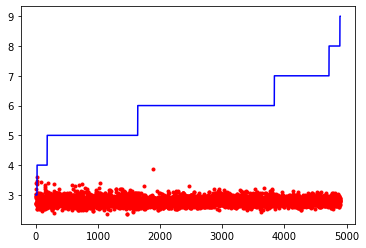

In [90]:
plt.plot(y_pred,'r.')
plt.plot(y,'b-')

In [100]:
def gradient(thetha):
    grad=np.sum((x_norm.dot(thetha)-y)*x_norm,axis=0).reshape(-1,1)/len(y)
    return grad

def find_cost(thetha):
    cost = np.sum((x_norm.dot(thetha)-y)**2,axis=0)[0]
    return cost

In [101]:
gradient(thetha0)

array([[-1.48070984],
       [-0.75997033],
       [-0.61649639],
       [-0.28863445],
       [-0.39371005],
       [-0.37340001],
       [-0.94626297],
       [-2.94933015],
       [-2.57710391],
       [-1.39700203],
       [-2.3182279 ],
       [-3.08370262]])

In [102]:
find_cost(thetha0)

50570.46925840971

In [117]:
def GradientDescent(thetha0 , learning_rate = 0.2 , epochs=10000 , TOL=0.00000002):
    
    thetha_history = [thetha0]
    cost_history = [find_cost(thetha0)]
   
    print(f'epoch \t Cost(J) \t')
    for epoch in range(epochs):
        print(f'{epoch:5d}\t{cost_history[-1]:7.4f}\t')
        grad = gradient(thetha0)
        cost = find_cost(thetha0)
        
        thethanew = thetha0 - learning_rate*grad
        thetha_history.append(thethanew)
        cost_history.append(cost)
        
        if np.sum((thethanew - thetha0)**2) < TOL:
            print('Convergence achieved.')
            break
        thetha0 = thethanew

    return thethanew , thetha_history , cost_history

In [118]:

thetha , thetha_history , cost_history = GradientDescent(thetha0)


epoch 	 Cost(J) 	
    0	50570.4693	
    1	50570.4693	
    2	6444.7654	
    3	4090.8599	
    4	3960.7363	
    5	3949.0239	
    6	3943.6413	
    7	3938.6218	
    8	3933.6473	
    9	3928.7010	
   10	3923.7816	
   11	3918.8891	
   12	3914.0232	
   13	3909.1838	
   14	3904.3707	
   15	3899.5837	
   16	3894.8228	
   17	3890.0877	
   18	3885.3783	
   19	3880.6944	
   20	3876.0359	
   21	3871.4027	
   22	3866.7945	
   23	3862.2112	
   24	3857.6527	
   25	3853.1188	
   26	3848.6094	
   27	3844.1244	
   28	3839.6635	
   29	3835.2266	
   30	3830.8137	
   31	3826.4245	
   32	3822.0589	
   33	3817.7168	
   34	3813.3980	
   35	3809.1024	
   36	3804.8298	
   37	3800.5801	
   38	3796.3532	
   39	3792.1490	
   40	3787.9672	
   41	3783.8078	
   42	3779.6706	
   43	3775.5555	
   44	3771.4624	
   45	3767.3911	
   46	3763.3415	
   47	3759.3135	
   48	3755.3070	
   49	3751.3217	
   50	3747.3576	
   51	3743.4146	
   52	3739.4926	
   53	3735.5913	
   54	3731.7107	
   55	3727.8507	
   56	3724.0111	
   57	3720.

  530	3006.9032	
  531	3006.4073	
  532	3005.9131	
  533	3005.4204	
  534	3004.9294	
  535	3004.4399	
  536	3003.9521	
  537	3003.4658	
  538	3002.9812	
  539	3002.4981	
  540	3002.0166	
  541	3001.5366	
  542	3001.0582	
  543	3000.5814	
  544	3000.1061	
  545	2999.6323	
  546	2999.1601	
  547	2998.6894	
  548	2998.2202	
  549	2997.7525	
  550	2997.2863	
  551	2996.8216	
  552	2996.3584	
  553	2995.8967	
  554	2995.4365	
  555	2994.9777	
  556	2994.5204	
  557	2994.0646	
  558	2993.6102	
  559	2993.1573	
  560	2992.7058	
  561	2992.2557	
  562	2991.8071	
  563	2991.3598	
  564	2990.9140	
  565	2990.4696	
  566	2990.0266	
  567	2989.5850	
  568	2989.1448	
  569	2988.7060	
  570	2988.2686	
  571	2987.8325	
  572	2987.3978	
  573	2986.9645	
  574	2986.5325	
  575	2986.1019	
  576	2985.6726	
  577	2985.2446	
  578	2984.8180	
  579	2984.3927	
  580	2983.9687	
  581	2983.5461	
  582	2983.1247	
  583	2982.7047	
  584	2982.2859	
  585	2981.8685	
  586	2981.4523	
  587	2981.0374	
  588	2980.623

 1038	2873.0699	
 1039	2872.9361	
 1040	2872.8025	
 1041	2872.6692	
 1042	2872.5362	
 1043	2872.4035	
 1044	2872.2711	
 1045	2872.1389	
 1046	2872.0070	
 1047	2871.8753	
 1048	2871.7440	
 1049	2871.6129	
 1050	2871.4821	
 1051	2871.3516	
 1052	2871.2213	
 1053	2871.0913	
 1054	2870.9616	
 1055	2870.8321	
 1056	2870.7029	
 1057	2870.5740	
 1058	2870.4454	
 1059	2870.3170	
 1060	2870.1888	
 1061	2870.0610	
 1062	2869.9334	
 1063	2869.8061	
 1064	2869.6790	
 1065	2869.5522	
 1066	2869.4256	
 1067	2869.2993	
 1068	2869.1733	
 1069	2869.0475	
 1070	2868.9220	
 1071	2868.7968	
 1072	2868.6718	
 1073	2868.5470	
 1074	2868.4226	
 1075	2868.2983	
 1076	2868.1744	
 1077	2868.0506	
 1078	2867.9272	
 1079	2867.8040	
 1080	2867.6810	
 1081	2867.5583	
 1082	2867.4358	
 1083	2867.3136	
 1084	2867.1916	
 1085	2867.0699	
 1086	2866.9485	
 1087	2866.8272	
 1088	2866.7063	
 1089	2866.5855	
 1090	2866.4651	
 1091	2866.3448	
 1092	2866.2248	
 1093	2866.1051	
 1094	2865.9856	
 1095	2865.8663	
 1096	2865.747

 1576	2828.2864	
 1577	2828.2371	
 1578	2828.1878	
 1579	2828.1386	
 1580	2828.0896	
 1581	2828.0406	
 1582	2827.9916	
 1583	2827.9428	
 1584	2827.8940	
 1585	2827.8454	
 1586	2827.7968	
 1587	2827.7483	
 1588	2827.6998	
 1589	2827.6515	
 1590	2827.6032	
 1591	2827.5550	
 1592	2827.5069	
 1593	2827.4589	
 1594	2827.4109	
 1595	2827.3631	
 1596	2827.3153	
 1597	2827.2676	
 1598	2827.2199	
 1599	2827.1724	
 1600	2827.1249	
 1601	2827.0775	
 1602	2827.0302	
 1603	2826.9830	
 1604	2826.9358	
 1605	2826.8887	
 1606	2826.8417	
 1607	2826.7948	
 1608	2826.7480	
 1609	2826.7012	
 1610	2826.6545	
 1611	2826.6079	
 1612	2826.5614	
 1613	2826.5149	
 1614	2826.4686	
 1615	2826.4223	
 1616	2826.3760	
 1617	2826.3299	
 1618	2826.2838	
 1619	2826.2378	
 1620	2826.1919	
 1621	2826.1461	
 1622	2826.1003	
 1623	2826.0546	
 1624	2826.0090	
 1625	2825.9635	
 1626	2825.9180	
 1627	2825.8726	
 1628	2825.8273	
 1629	2825.7821	
 1630	2825.7369	
 1631	2825.6918	
 1632	2825.6468	
 1633	2825.6018	
 1634	2825.557

 2063	2811.6225	
 2064	2811.5995	
 2065	2811.5766	
 2066	2811.5538	
 2067	2811.5309	
 2068	2811.5081	
 2069	2811.4854	
 2070	2811.4626	
 2071	2811.4399	
 2072	2811.4173	
 2073	2811.3946	
 2074	2811.3720	
 2075	2811.3495	
 2076	2811.3269	
 2077	2811.3044	
 2078	2811.2820	
 2079	2811.2595	
 2080	2811.2371	
 2081	2811.2148	
 2082	2811.1924	
 2083	2811.1701	
 2084	2811.1479	
 2085	2811.1256	
 2086	2811.1034	
 2087	2811.0813	
 2088	2811.0591	
 2089	2811.0370	
 2090	2811.0149	
 2091	2810.9929	
 2092	2810.9709	
 2093	2810.9489	
 2094	2810.9270	
 2095	2810.9051	
 2096	2810.8832	
 2097	2810.8613	
 2098	2810.8395	
 2099	2810.8178	
 2100	2810.7960	
 2101	2810.7743	
 2102	2810.7526	
 2103	2810.7309	
 2104	2810.7093	
 2105	2810.6877	
 2106	2810.6662	
 2107	2810.6446	
 2108	2810.6231	
 2109	2810.6017	
 2110	2810.5802	
 2111	2810.5588	
 2112	2810.5375	
 2113	2810.5161	
 2114	2810.4948	
 2115	2810.4735	
 2116	2810.4523	
 2117	2810.4311	
 2118	2810.4099	
 2119	2810.3887	
 2120	2810.3676	
 2121	2810.346

 2575	2803.2896	
 2576	2803.2784	
 2577	2803.2673	
 2578	2803.2561	
 2579	2803.2450	
 2580	2803.2338	
 2581	2803.2227	
 2582	2803.2116	
 2583	2803.2005	
 2584	2803.1895	
 2585	2803.1784	
 2586	2803.1674	
 2587	2803.1563	
 2588	2803.1453	
 2589	2803.1343	
 2590	2803.1233	
 2591	2803.1124	
 2592	2803.1014	
 2593	2803.0905	
 2594	2803.0796	
 2595	2803.0686	
 2596	2803.0577	
 2597	2803.0469	
 2598	2803.0360	
 2599	2803.0251	
 2600	2803.0143	
 2601	2803.0035	
 2602	2802.9927	
 2603	2802.9819	
 2604	2802.9711	
 2605	2802.9603	
 2606	2802.9496	
 2607	2802.9388	
 2608	2802.9281	
 2609	2802.9174	
 2610	2802.9067	
 2611	2802.8960	
 2612	2802.8854	
 2613	2802.8747	
 2614	2802.8641	
 2615	2802.8535	
 2616	2802.8428	
 2617	2802.8322	
 2618	2802.8217	
 2619	2802.8111	
 2620	2802.8005	
 2621	2802.7900	
 2622	2802.7795	
 2623	2802.7690	
 2624	2802.7585	
 2625	2802.7480	
 2626	2802.7375	
 2627	2802.7270	
 2628	2802.7166	
 2629	2802.7062	
 2630	2802.6958	
 2631	2802.6853	
 2632	2802.6750	
 2633	2802.664

 3076	2799.1635	
 3077	2799.1576	
 3078	2799.1517	
 3079	2799.1458	
 3080	2799.1399	
 3081	2799.1341	
 3082	2799.1282	
 3083	2799.1223	
 3084	2799.1165	
 3085	2799.1106	
 3086	2799.1048	
 3087	2799.0990	
 3088	2799.0932	
 3089	2799.0873	
 3090	2799.0815	
 3091	2799.0757	
 3092	2799.0699	
 3093	2799.0641	
 3094	2799.0584	
 3095	2799.0526	
 3096	2799.0468	
 3097	2799.0410	
 3098	2799.0353	
 3099	2799.0295	
 3100	2799.0238	
 3101	2799.0181	
 3102	2799.0123	
 3103	2799.0066	
 3104	2799.0009	
 3105	2798.9952	
 3106	2798.9895	
 3107	2798.9838	
 3108	2798.9781	
 3109	2798.9725	
 3110	2798.9668	
 3111	2798.9611	
 3112	2798.9555	
 3113	2798.9498	
 3114	2798.9442	
 3115	2798.9385	
 3116	2798.9329	
 3117	2798.9273	
 3118	2798.9217	
 3119	2798.9161	
 3120	2798.9105	
 3121	2798.9049	
 3122	2798.8993	
 3123	2798.8937	
 3124	2798.8881	
 3125	2798.8826	
 3126	2798.8770	
 3127	2798.8714	
 3128	2798.8659	
 3129	2798.8604	
 3130	2798.8548	
 3131	2798.8493	
 3132	2798.8438	
 3133	2798.8383	
 3134	2798.832

 3584	2796.9159	
 3585	2796.9126	
 3586	2796.9094	
 3587	2796.9062	
 3588	2796.9030	
 3589	2796.8997	
 3590	2796.8965	
 3591	2796.8933	
 3592	2796.8901	
 3593	2796.8869	
 3594	2796.8837	
 3595	2796.8805	
 3596	2796.8773	
 3597	2796.8741	
 3598	2796.8709	
 3599	2796.8677	
 3600	2796.8646	
 3601	2796.8614	
 3602	2796.8582	
 3603	2796.8550	
 3604	2796.8519	
 3605	2796.8487	
 3606	2796.8455	
 3607	2796.8424	
 3608	2796.8392	
 3609	2796.8361	
 3610	2796.8329	
 3611	2796.8298	
 3612	2796.8267	
 3613	2796.8235	
 3614	2796.8204	
 3615	2796.8173	
 3616	2796.8142	
 3617	2796.8110	
 3618	2796.8079	
 3619	2796.8048	
 3620	2796.8017	
 3621	2796.7986	
 3622	2796.7955	
 3623	2796.7924	
 3624	2796.7893	
 3625	2796.7862	
 3626	2796.7831	
 3627	2796.7800	
 3628	2796.7770	
 3629	2796.7739	
 3630	2796.7708	
 3631	2796.7677	
 3632	2796.7647	
 3633	2796.7616	
 3634	2796.7585	
 3635	2796.7555	
 3636	2796.7524	
 3637	2796.7494	
 3638	2796.7463	
 3639	2796.7433	
 3640	2796.7403	
 3641	2796.7372	
 3642	2796.734

 4088	2795.6706	
 4089	2795.6687	
 4090	2795.6669	
 4091	2795.6650	
 4092	2795.6632	
 4093	2795.6613	
 4094	2795.6595	
 4095	2795.6577	
 4096	2795.6558	
 4097	2795.6540	
 4098	2795.6522	
 4099	2795.6504	
 4100	2795.6485	
 4101	2795.6467	
 4102	2795.6449	
 4103	2795.6431	
 4104	2795.6413	
 4105	2795.6395	
 4106	2795.6376	
 4107	2795.6358	
 4108	2795.6340	
 4109	2795.6322	
 4110	2795.6304	
 4111	2795.6286	
 4112	2795.6268	
 4113	2795.6250	
 4114	2795.6232	
 4115	2795.6214	
 4116	2795.6196	
 4117	2795.6178	
 4118	2795.6161	
 4119	2795.6143	
 4120	2795.6125	
 4121	2795.6107	
 4122	2795.6089	
 4123	2795.6071	
 4124	2795.6054	
 4125	2795.6036	
 4126	2795.6018	
 4127	2795.6001	
 4128	2795.5983	
 4129	2795.5965	
 4130	2795.5948	
 4131	2795.5930	
 4132	2795.5912	
 4133	2795.5895	
 4134	2795.5877	
 4135	2795.5860	
 4136	2795.5842	
 4137	2795.5825	
 4138	2795.5807	
 4139	2795.5790	
 4140	2795.5772	
 4141	2795.5755	
 4142	2795.5737	
 4143	2795.5720	
 4144	2795.5702	
 4145	2795.5685	
 4146	2795.566

 4612	2794.9299	
 4613	2794.9288	
 4614	2794.9278	
 4615	2794.9267	
 4616	2794.9257	
 4617	2794.9246	
 4618	2794.9236	
 4619	2794.9225	
 4620	2794.9215	
 4621	2794.9204	
 4622	2794.9194	
 4623	2794.9183	
 4624	2794.9173	
 4625	2794.9162	
 4626	2794.9152	
 4627	2794.9141	
 4628	2794.9131	
 4629	2794.9121	
 4630	2794.9110	
 4631	2794.9100	
 4632	2794.9089	
 4633	2794.9079	
 4634	2794.9069	
 4635	2794.9058	
 4636	2794.9048	
 4637	2794.9038	
 4638	2794.9027	
 4639	2794.9017	
 4640	2794.9007	
 4641	2794.8996	
 4642	2794.8986	
 4643	2794.8976	
 4644	2794.8966	
 4645	2794.8955	
 4646	2794.8945	
 4647	2794.8935	
 4648	2794.8925	
 4649	2794.8915	
 4650	2794.8904	
 4651	2794.8894	
 4652	2794.8884	
 4653	2794.8874	
 4654	2794.8864	
 4655	2794.8854	
 4656	2794.8843	
 4657	2794.8833	
 4658	2794.8823	
 4659	2794.8813	
 4660	2794.8803	
 4661	2794.8793	
 4662	2794.8783	
 4663	2794.8773	
 4664	2794.8763	
 4665	2794.8753	
 4666	2794.8743	
 4667	2794.8733	
 4668	2794.8723	
 4669	2794.8713	
 4670	2794.870